In [1]:
import os
import re
import nltk
from unidecode import unidecode
from nltk.corpus import wordnet
from collections import Counter
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import spacy

In [2]:
# Funcție pentru citirea textului din fișier
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()
    
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'texts.txt')

allData = read_text(filePath)

In [3]:
# numarul de propozitii din text

sentences = re.split(r'[.!?]', allData)
print("Numarul propozitiilor din text este: ", len(sentences))

Numarul propozitiilor din text este:  10


In [4]:
# numarul de cuvinte din text

words = re.findall(r'\w+', allData)
print("Numarul cuvintelor din text este: ", len(words))

Numarul cuvintelor din text este:  156


In [5]:
# numarul de cuvinte diferite din text

print("Numarul cuvintelor diferite din text este: ", len(set(words)))

Numarul cuvintelor diferite din text este:  94


In [6]:
# cel mai scurt si cel mai lung cuvant (cuvinte)

min_word = min(words, key=len)
max_word = max(words, key=len)
print("Cel mai scurt cuvant din text este: ", min_word)
print("Cel mai lung cuvant din text este: ", max_word)

Cel mai scurt cuvant din text este:  o
Cel mai lung cuvant din text este:  laboratoarele


In [7]:
# textul fara diacritice

print("Textul fara diacritice:")
print(unidecode(allData))

Textul fara diacritice:
Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul "general". 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul "Am citit textul pentru problema 3". 
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa fiti activi si sa adresati intrebari atunci cand 
ceva nu este clar. Fie ca este vorba de o discutie in timp real 
sau prin intermediul platformei Teams, canalul "general", suntem 
aici sa va sprijinim.
Succes si sa inceapa aventura AI!
Cu consideratie, 

In [8]:
# sinonimele celui mai lung cuvant din text

# Load the Romanian language model
nlp = spacy.load("ro_core_news_sm")

# Perform lemmatization
doc = nlp(max_word)
for token in doc:
    lemma = token.lemma_
print(lemma)

sinonime = set()
for synset in wordnet.synsets(lemma, lang="ron"):
    for l in synset.lemmas("ron"):
        sinonime.add(l.name())

print(list(sinonime))

laborator
['laboratordeștiințe', 'poligondeîncercare', 'laboratordecercetare', 'laborator']


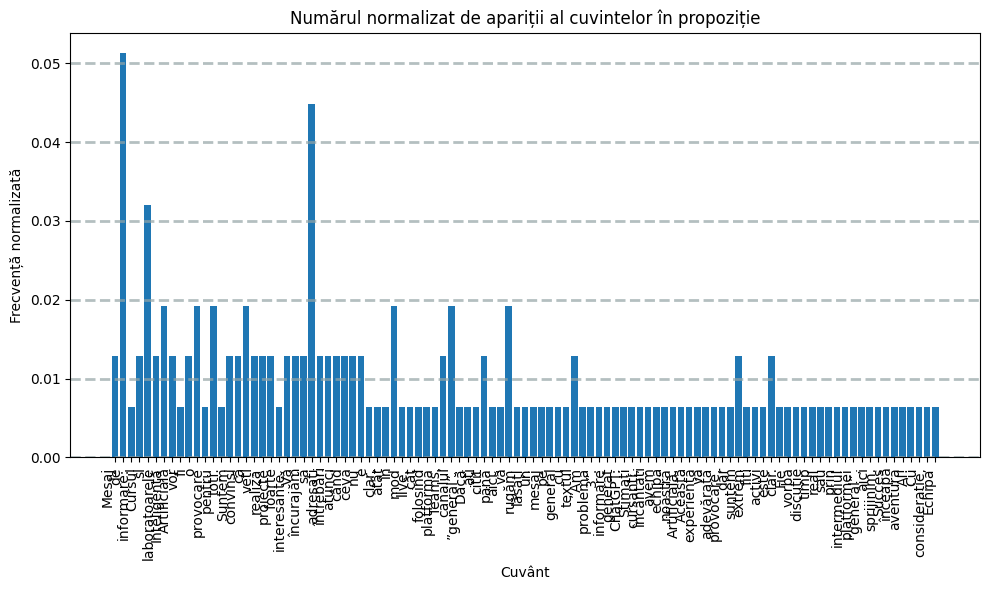

In [9]:
def normalize_word_counts(sentence):
    words = sentence.split()
    word_counts = Counter(words) # calculeaza numarul de aparitii al fiecarui cuvant folosind Counter
    total_words = sum(word_counts.values()) # calculeaza numarul total de cuvinte în propozitie
    
    # Normalizarea numărului de apariții la nivelul propoziției
    normalized_word_counts = {word: count / total_words for word, count in word_counts.items()}
    return normalized_word_counts

normalized_counts = normalize_word_counts(allData)
#print(normalized_counts)

def plot_word_counts(normalized_counts):
    # Extrage cuvintele și frecvențele normalizate
    words = list(normalized_counts.keys())
    frequencies = list(normalized_counts.values())

    # Plot the normalized values
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Cuvânt')
    plt.ylabel('Frecvență normalizată')
    plt.title('Numărul normalizat de apariții al cuvintelor în propoziție')
    plt.xticks(rotation=90, ha='right')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_word_counts(normalized_counts)